# California Housing Price Basic Makine Öğrenmesi (ML) Uygulaması 

### Veri Seti Hakkında

<p>Bu veri seti, Aurélien Géron'un son kitabı "Hands-On Machine learning with Scikit-Learn and TensorFlow"un ikinci bölümünde kullanılan veri setidir. Makine öğrenimi algoritmalarını uygulamanın mükemmel bir girişini sağlar çünkü basit veri temizliği gerektirir, anlaşılması kolay değişken listesine sahiptir.

Veri seti, 1990 California nüfus sayımından bilgiler içerir. Makine öğrenimi temelleri hakkında insanlara öğretim için erişilebilir bir giriş verir.





</p><br>

<div style="display: flex;">
    <img src="jpg/california.jpg" alt="California" style="width:450px;height:200px; margin-left: 10px;">
</div>

Açıklayıcı:

longitude: Konutun boylamı (derece cinsinden)

latitude: Konutun enlemi (derece cinsinden)

housing_median_age: Konutların medyan yaşı

total_rooms: Toplam oda sayısı

total_bedrooms: Toplam yatak odası sayısı

population: Nüfus

households: Hanehalkı sayısı

median_income: Medyan gelir

median_house_value: Konutların medyan değeri

ocean_proximity: Okyanus yakınlığı (kategorik değişken)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.columns = ["boy", "en", "konut_yasi", "toplam_oda_sayi", "toplam_yatak_oda_sayi", 
              "nufus", "hane_sayisi", "ortalama_gelir", "ortalama_ev_fiyati", "okyanus_yakinlik"]

In [7]:
df.head(5)

,boy,en,konut_yasi,toplam_oda_sayi,toplam_yatak_oda_sayi,nufus,hane_sayisi,ortalama_gelir,ortalama_ev_fiyati,okyanus_yakinlik
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   boy                    20640 non-null  float64
 1   en                     20640 non-null  float64
 2   konut_yasi             20640 non-null  float64
 3   toplam_oda_sayi        20640 non-null  float64
 4   toplam_yatak_oda_sayi  20433 non-null  float64
 5   nufus                  20640 non-null  float64
 6   hane_sayisi            20640 non-null  float64
 7   ortalama_gelir         20640 non-null  float64
 8   ortalama_ev_fiyati     20640 non-null  float64
 9   okyanus_yakinlik       20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.isna().sum()

boy                        0
en                         0
konut_yasi                 0
toplam_oda_sayi            0
toplam_yatak_oda_sayi    207
nufus                      0
hane_sayisi                0
ortalama_gelir             0
ortalama_ev_fiyati         0
okyanus_yakinlik           0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
boy,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
en,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
konut_yasi,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
toplam_oda_sayi,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
toplam_yatak_oda_sayi,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
nufus,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
hane_sayisi,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
ortalama_gelir,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
ortalama_ev_fiyati,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [11]:
df["toplam_yatak_oda_sayi"].fillna(df["toplam_yatak_oda_sayi"].mean(), inplace=True)

In [12]:
df.isna().sum()

boy                      0
en                       0
konut_yasi               0
toplam_oda_sayi          0
toplam_yatak_oda_sayi    0
nufus                    0
hane_sayisi              0
ortalama_gelir           0
ortalama_ev_fiyati       0
okyanus_yakinlik         0
dtype: int64

In [13]:
df["okyanus_yakinlik"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
# Kategorik değişken label_encoding
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

df["okyanus_yakinlik"] = label_enc.fit_transform(df["okyanus_yakinlik"])

In [15]:
df.head(5)

,boy,en,konut_yasi,toplam_oda_sayi,toplam_yatak_oda_sayi,nufus,hane_sayisi,ortalama_gelir,ortalama_ev_fiyati,okyanus_yakinlik
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [16]:
df["okyanus_yakinlik"].head(5)

0    3
1    3
2    3
3    3
4    3
Name: okyanus_yakinlik, dtype: int32

In [17]:
num_df_for_corr = df.drop(["okyanus_yakinlik"],axis=1)
corr = num_df_for_corr.corr()

<Axes: >

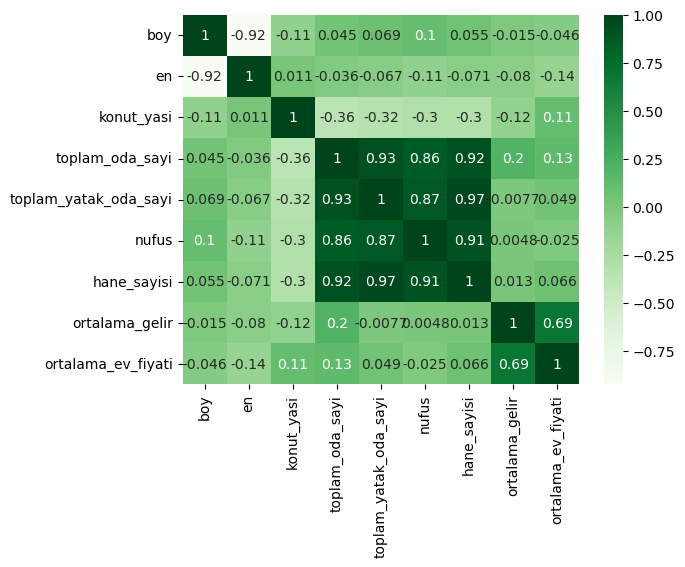

In [18]:
sns.heatmap(corr, annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = "Greens")

In [19]:
# x-y ayrım
x = df.drop(["ortalama_ev_fiyati"], axis=1)
y = df.iloc[:,-2]

In [20]:
x

,boy,en,konut_yasi,toplam_oda_sayi,toplam_yatak_oda_sayi,nufus,hane_sayisi,ortalama_gelir,okyanus_yakinlik
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [21]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: ortalama_ev_fiyati, Length: 20640, dtype: float64

In [22]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.20, random_state = 42)

In [23]:
# Birimsizleştirme (Standard Scaling)
from sklearn.preprocessing import StandardScaler

standard_s = StandardScaler()
x_train = standard_s.fit_transform(x_train)
x_test = standard_s.fit_transform(x_test)

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predictions_lr = lr.predict(x_test)
predictions_lr

array([ 76539.21532946, 167850.36142074, 267359.26802988, ...,
       444985.99454011, 132282.97593662, 177053.55974543])

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
r2 = r2_score(y_test, predictions_lr)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 71168.60848331274
R-square: 0.6134816749920091


### Random Forest

In [27]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)
predictions_rf

array([ 52371.  ,  72076.  , 359255.09, ..., 500001.  ,  87896.  ,
       154426.  ])

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 62504.81580104898
R-square: 0.7018601014495763
